## Video Games Sales

### Описание:
В тбалице представлены данные о прадажах видео игр
* `Name` - Name of the game
* `Platform` - Console on which the game is running
* `Year_of_Release` - Year of the game released
* `Genre` - Game's category
* `Publisher` - Publisher
* `NA_Sales` - Game sales in North America (in millions of units)
* `EU_Sales` - Game sales in the European Union (in millions of units)
* `JP_Sales` - Game sales in Japan (in millions of units)
* `Other_Sales` - Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and 
* `Global_Sales` - Total sales in the world (in millions of units)
* `Critic_Score` - Aggregate score compiled by Metacritic staff
* `Critic_Count`- The number of critics used in coming up with the 
* `User_Score`- Score by Metacritic's subscribers
* `User_Count`- Number of users who gave the user_score
* `Developer`- Party responsible for creating the game
* `Rating`- The ESRB ratings

## Цель работы --  проверка следующих гипотез :
* Игры, выпущенные на консолях Sony, продаются лучше, чем игры, выпущенные на консолях Xbox
* Игры в жанре экшн продаются лучше, чем игры в других жанрах
* В Японии и в Европе предпочитают разные жанры игр. В Японии больше играют в ролевые игры, в Европе в экшен 
* Игры с более высокими оценками критиков продаются лучше, чем игры с более низкими оценками критиков



## Ход работы:
* Обзор данных
* Предобработка данных
* Анализ данных
* Проверка гипотез 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind,mannwhitneyu
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6107,Netsu Chu! Pro Yakyuu 2003,PS2,2003.0,Sports,Namco Bandai Games,0.00,0.00,0.28,0.00,0.28,NaN,NaN,NaN,NaN,NaN,NaN
10218,Winter Stars,Wii,2011.0,Sports,Deep Silver,0.05,0.05,0.00,0.01,0.11,NaN,NaN,tbd,NaN,49Games,E
1911,Plants vs. Zombies: Garden Warfare,X360,2014.0,Shooter,Electronic Arts,0.51,0.47,0.00,0.09,1.08,69.0,6.0,7.3,121.0,PopCap,E10+
8865,Petz: Dogz Talent Show,DS,2009.0,Simulation,Ubisoft,0.14,0.00,0.00,0.01,0.15,NaN,NaN,tbd,NaN,Ubisoft Nagoya,E
12024,Moxie Girlz,DS,2011.0,Misc,GameMill Entertainment,0.07,0.00,0.00,0.00,0.07,NaN,NaN,tbd,NaN,1st Playable Productions,E


### Приведем все буквы в названиях  столбцов в строчные

In [4]:
df = df.rename(columns=dict(zip(df.columns, list([x.lower() for x in df.columns]))))
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [5]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### Удаление пустых значений 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
display(df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')  

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


Для доказательства первых трех гипотез нам нужны столбцы:
* Genre 
* NA_Sales              
* EU_Sales
* JP_Sales
* Global_Sales

Как видно, у этих столбцов немного пропущенных значений. Удалим строки с пропущенными значениями из данных 

In [10]:
df = df.dropna(subset=['genre']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
critic_count       8580
user_score         6702
user_count         9127
developer          6621
rating             6767
dtype: int64

`user_score` имеет тип object. Приведем его к float.

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим `tbd` на nan

In [12]:
df.user_score.replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16716 non-null  object 
 1   platform         16716 non-null  object 
 2   year_of_release  16447 non-null  float64
 3   genre            16716 non-null  object 
 4   publisher        16662 non-null  object 
 5   na_sales         16716 non-null  float64
 6   eu_sales         16716 non-null  float64
 7   jp_sales         16716 non-null  float64
 8   other_sales      16716 non-null  float64
 9   global_sales     16716 non-null  float64
 10  critic_score     8136 non-null   float64
 11  critic_count     8136 non-null   float64
 12  user_score       7589 non-null   float64
 13  user_count       7589 non-null   float64
 14  developer        10095 non-null  object 
 15  rating           9949 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### Анализ данных 

Посмотрим на распределение продаж по регионам 

In [13]:
df_by_region = df.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].sum().reset_index()

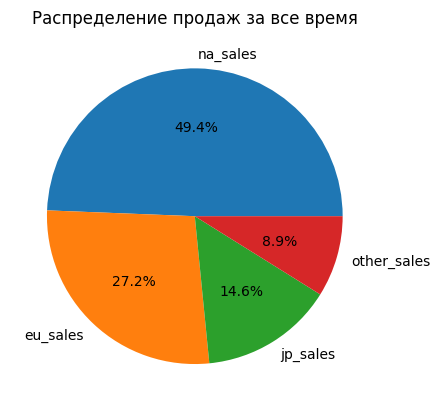

In [14]:
plt.pie(df_by_region.iloc[:,1],
        labels=df_by_region.iloc[:,0],autopct='%1.1f%%')
plt.title('Распределение продаж за все время')
plt.show()

Как видно больше всего продаж в северной америке. 
        
Теперь посмотрим продажи по регионам, но уже в разрезе по категориям. Во всех ли категориях больше всего продаж у Северной Америки ?

In [15]:
df_by_genre = df.groupby('genre').agg('sum').loc[:,['na_sales','eu_sales','jp_sales','other_sales','global_sales']]
df_by_genre

,na_sales,eu_sales,jp_sales,other_sales,global_sales
genre,,,,,
Action,879.01,519.13,161.44,184.60,1745.27
Adventure,105.26,63.54,52.30,16.49,237.69
Fighting,223.36,100.33,87.48,36.36,447.48
Misc,407.27,212.74,108.11,74.39,803.18
Platform,445.50,200.35,130.83,51.09,828.08
Puzzle,122.87,50.01,57.31,12.38,243.02
Racing,359.35,236.51,56.71,76.10,728.90
Role-Playing,330.81,188.71,355.46,59.63,934.40
Shooter,592.24,317.34,38.76,104.11,1052.94


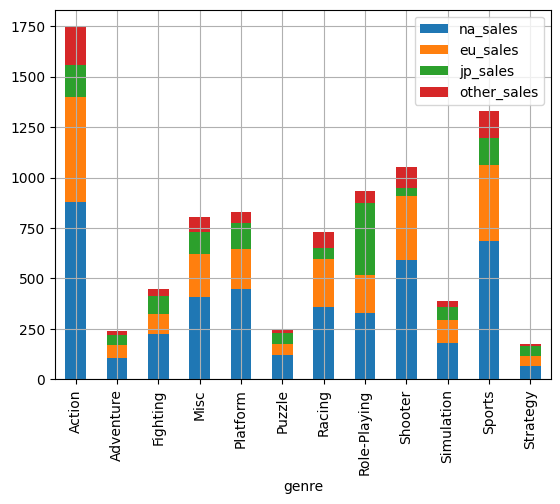

In [16]:
ax = df_by_genre.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].plot(kind='bar',stacked=True)
plt.grid()
plt.show()

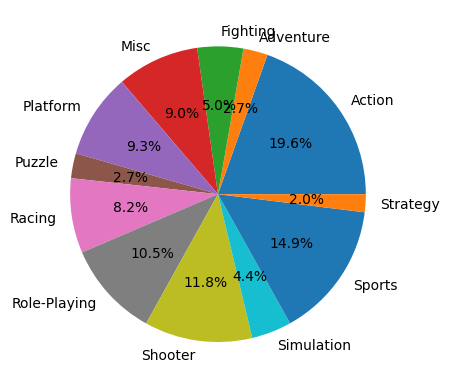

In [17]:
plt.pie(df_by_genre.global_sales, labels = df_by_genre.index, autopct='%1.1f%%')
plt.show()

Игры в жанре Action продаются больше всего. Также видно, что Япония лидирует по количеству продаж Role-Playing.

Сравним популярность различных категорий в Европе и Японии

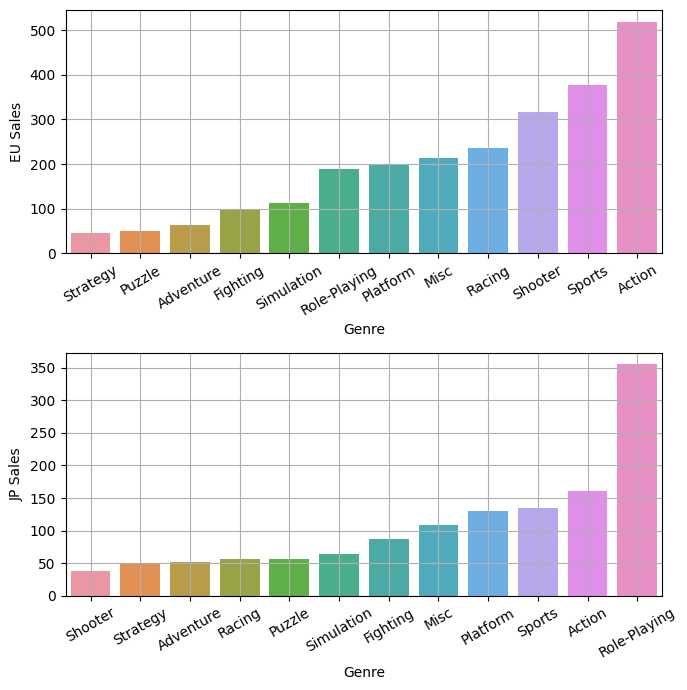

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
sns.barplot(df_by_genre.sort_values(by='eu_sales').reset_index(), x='genre', y='eu_sales', ax=ax1)
sns.barplot(df_by_genre.sort_values(by='jp_sales').reset_index(), x='genre', y='jp_sales', ax=ax2)
ax1.set(xlabel="Genre", ylabel="EU Sales")
ax2.set(xlabel="Genre", ylabel="JP Sales")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
fig.tight_layout()
ax1.grid()
ax2.grid()
plt.show()

### Игры, выпущенные на платформе Sony, продаются лучше, чем игры, выпущенные на платформе Xbox

К платформе Sony относятся следующие консоли:
* `PS`
* `PS2`
* `PS3'`
* `PS4`
* `PSP`
* `PSV`

К платформе Xbox
* `X360`
* `XB`
* `XOne`

    Для начала сравним общее количество продаж у разных платформ 

In [19]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
def platform_trans(x):
    if x in ['PS','PS2','PS3','PS4','PSP','PSV']:
        x = 'PS'   
    elif x in ['X360','XB','XOne']:
        x = 'Xbox'
    else:
        x = 'Other'
    
    return x

In [21]:
df['platform_new']=df['platform'].apply(platform_trans)
df.tail()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,platform_new
16711,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PS
16712,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Xbox
16713,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PS
16714,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Other
16715,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PS


In [22]:
data_by_platform = df[(df['platform_new'] == 'Xbox') | (df['platform_new'] == 'PS')].groupby('platform_new').agg('sum')['global_sales'].reset_index()

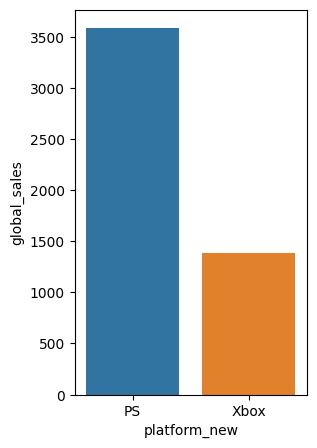

In [23]:
plt.figure(figsize=(3,5))
sns.barplot(data_by_platform, x='platform_new', y='global_sales')
plt.show()

Общее количество продаж больше у Sony. Теперь сравним количество продаж только для тех игр, которые есть у обеих платформ. 

In [24]:
uniq_ps = df[df['platform_new']=='PS'].name.unique()
uniq_xbox = df[df['platform_new']=='Xbox'].name.unique()
print(uniq_ps.shape)
print(uniq_xbox.shape)

(5842,)
(2179,)


In [25]:
intersection = set(uniq_ps) & set(uniq_xbox)
len(list(intersection))

1545

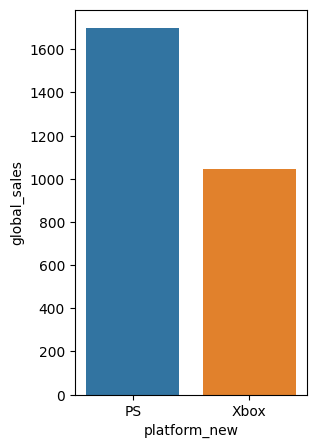

In [26]:
data_by_platform_inter = df[(df['name'].isin(intersection)) & ((df['platform_new'] == 'Xbox') | (df['platform_new'] == 'PS'))]\
                        .groupby('platform_new').agg('sum')['global_sales'].reset_index()
plt.figure(figsize=(3,5))
sns.barplot(data_by_platform_inter, x='platform_new', y='global_sales')
plt.show()

    Продаж снова больше у Sony. Различия между группами велики, поэтому нет необходимости проводить статистический тест

### Игры, выпущенные на платформе Sony, имеют более высокие оценки пользователей, чем игры, выпущенные на платформе Xbox

Для того, чтобы доказать эту и следующую гипотезу нужно очистить данные от пустых значений столбцов с оценками

In [27]:
df = df.dropna(subset=['critic_score','user_score']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7016 entries, 0 to 7015
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7016 non-null   object 
 1   platform         7016 non-null   object 
 2   year_of_release  6893 non-null   float64
 3   genre            7016 non-null   object 
 4   publisher        7012 non-null   object 
 5   na_sales         7016 non-null   float64
 6   eu_sales         7016 non-null   float64
 7   jp_sales         7016 non-null   float64
 8   other_sales      7016 non-null   float64
 9   global_sales     7016 non-null   float64
 10  critic_score     7016 non-null   float64
 11  critic_count     7016 non-null   float64
 12  user_score       7016 non-null   float64
 13  user_count       7016 non-null   float64
 14  developer        7012 non-null   object 
 15  rating           6946 non-null   object 
 16  platform_new     7016 non-null   object 
dtypes: float64(10)

In [28]:
df_user_score = df[((df['platform_new'] == 'Xbox') | (df['platform_new'] == 'PS'))][['platform_new','user_score']]


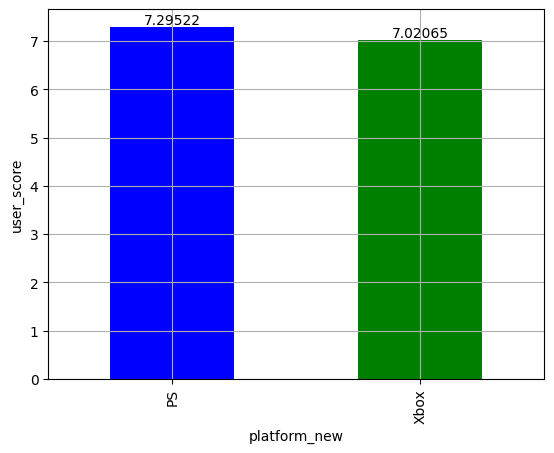

In [29]:
ax = df_user_score.groupby('platform_new').apply('mean')['user_score'].plot(kind = 'bar',grid=True,color=['blue','green'])
plt.ylabel('user_score')
plt.bar_label(ax.containers[0])
plt.show()

Различие между группами небольшое. Стоит провести статистический тест для вынесения объективных выводов.

Посмотрим распределение оценок и проверим группы на нормальность

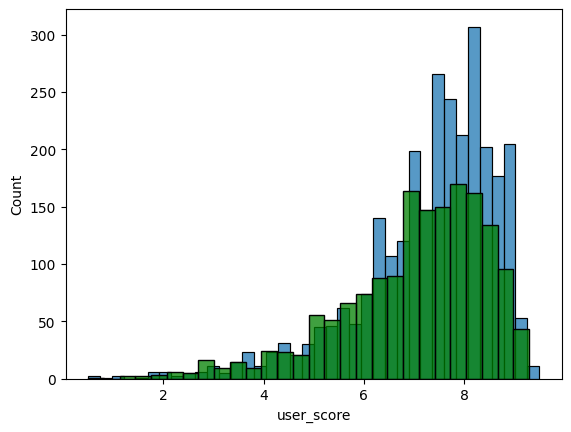

In [30]:
sns.histplot(df_user_score[df_user_score.platform_new == 'PS']['user_score'])
sns.histplot(df_user_score[df_user_score.platform_new == 'Xbox']['user_score'],color='green')
plt.show()

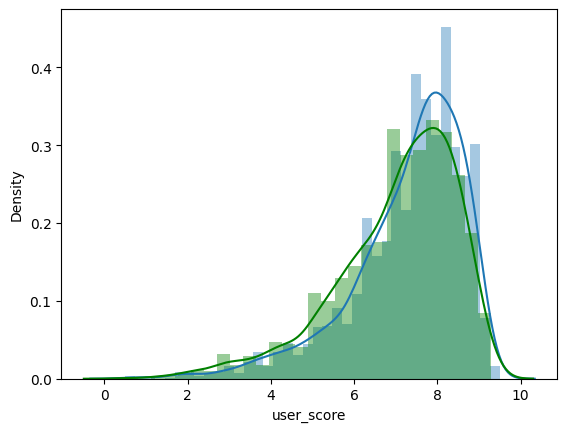

In [31]:
sns.distplot(df_user_score[df_user_score.platform_new == 'PS']['user_score'])
sns.distplot(df_user_score[df_user_score.platform_new == 'Xbox']['user_score'],color='green')
plt.show()

Распределение похоже на нормальное, однако имеет более длинный хвост слева. 
Визуально разница между группами слабая

### Основная и альтернативания гипотеза:

 \begin{cases}
   H_0 :\text{средние пользовательские рейтинги Xbox и PS одинаковы}\\
   H_1 :\text{средние пользовательские рейтинги PS больше чем у Xbox}
 \end{cases}


In [32]:
df_user_score[df_user_score.platform_new == 'PS']['user_score'].mean()

7.2952214858737365

In [33]:
alpha=0.05
t,p = ttest_ind(df_user_score[df_user_score.platform_new == 'PS']['user_score'],
                df_user_score[df_user_score.platform_new == 'Xbox']['user_score'])


print('t: '+str(t)+'\np: '+str(p))
if (p/2<alpha) and (df_user_score[df_user_score.platform_new == 'PS']['user_score'].mean() > 
                    df_user_score[df_user_score.platform_new == 'Xbox']['user_score'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t: 6.2938342099503295
p: 3.3928056919339307e-10
Отвергаем нулевую гипотезу


In [34]:
u,p = mannwhitneyu(df_user_score[df_user_score.platform_new == 'PS']['user_score'],df_user_score[df_user_score.platform_new == 'Xbox']['user_score'])
print(u,p)

2611335.0 2.42664864098909e-11


### Игры с более высокими оценками критиков продаются лучше, чем игры с более низкими оценками критиков

Для того, чтобы доказать данную гипотезу нужно очистить данные от пустых значений столбцов с оценками критиков 

Разобьем игры на две группы. В первой группе будут более высокие оценки критиков, во второй менее высокие. Разбивать будем следующем образом: вычислим медианное значение оценки критиков, в одной группе будут игры, у которых оценка ниже медианной оценки критиков, у другой выше 

In [35]:
score_median = df.critic_score.median()
score_median

72.0

In [36]:
df[df.critic_score < score_median].count()[0]

3333

In [37]:
df[df.critic_score >= score_median].count()[0]

3683

Группы получились немного разные по величине. Это произошло из-за того, что оценку равную медиане принимает большое количество игр. Для начала посмотрим на количество продаж для этих групп, если они не будут сильно отличаться, то стоит разделить данные на две группы другим способом

In [38]:
df[df.critic_score < score_median]['global_sales'].sum()

1257.0700000000002

In [39]:
df[df.critic_score >= score_median]['global_sales'].sum()

4125.3

Продажи игр с высокой оценкой больше чем в три раза превышают продажи игр с низкой оценкой. Разбивать группы другим способом не имеет смысла

Посмотрим также как выглядит распределение продаж в зависимости от оценок критиков

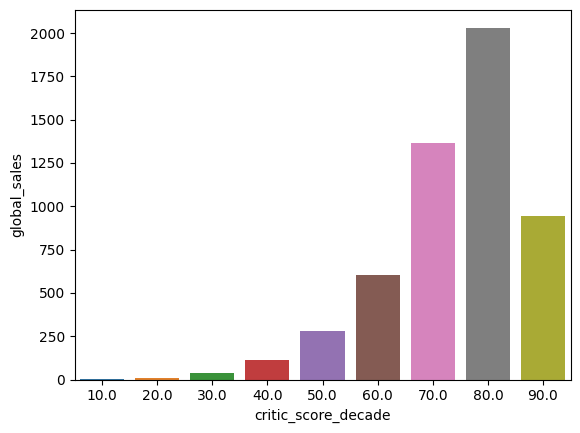

In [40]:
df['critic_score_decade'] = df['critic_score']//10*10
df_by_critic = df.groupby('critic_score_decade').agg('sum')['global_sales'].reset_index()
sns.barplot(df_by_critic, x = 'critic_score_decade', y = 'global_sales')
plt.show()

Также посмотрим среднее количество продаж на одну игру в зависимости от оценок критиков 

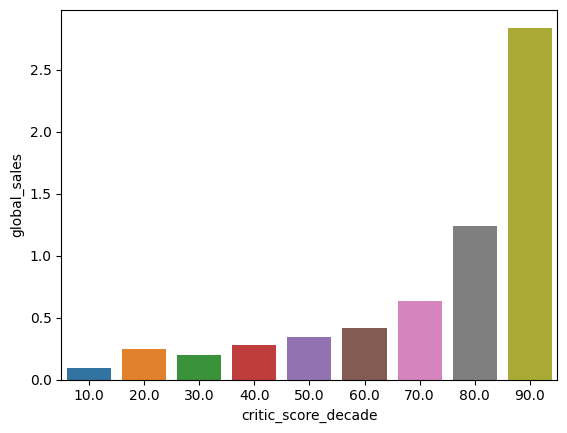

In [41]:
df_sum_count = df.groupby('critic_score_decade').agg('mean')['global_sales'].reset_index()
sns.barplot(df_sum_count, x='critic_score_decade', y = 'global_sales')
plt.show()

In [49]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating',
       'platform_new', 'critic_score_decade'],
      dtype='object')

### Посмотрим на корреляцию параметров в зависисмоти от года релиза

In [93]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [94]:
df.corr().loc[['year_of_release', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
        'user_score'],['year_of_release']].style.background_gradient(axis=0)

,year_of_release
year_of_release,1.000000
na_sales,-0.020410
eu_sales,0.038077
jp_sales,-0.041684
other_sales,0.038858
global_sales,0.002508
critic_score,-0.011359
user_score,-0.251347


Можно заметить практически отсутствующую отрицательную корреляцию между годом релиза и оценкой критиков и слабю корреляцию между годом релиза и оценкой пользователей. Это может говорить о том, что пользователям меньше нравятся новые игры. Посмотрим на графики, чтобы лучше понять ситуацию. 

In [97]:
df['year_of_release_new']=(df['year_of_release']//2*2).astype('int')
df.year_of_release.unique()

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2012., 2014., 1997., 1999., 2015., 2016., 2003.,
       1998., 1996., 2000., 1994., 1985., 1992., 1988.])

In [98]:
df.decade_year.unique()

array([2005., 2010., 2000., 1995., 2015., 1990., 1985.])

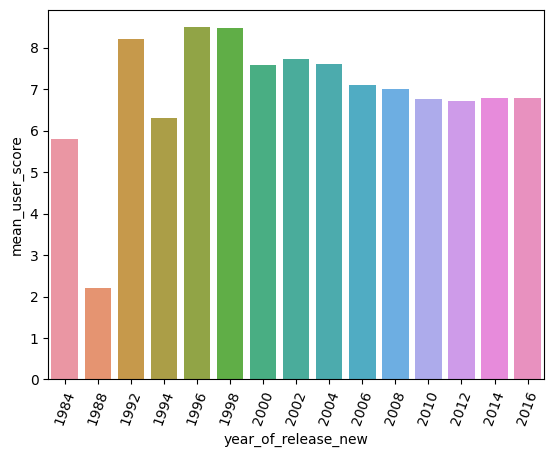

In [99]:
sns.barplot(df.groupby('year_of_release_new').agg('mean')['user_score'].reset_index(name='mean_user_score'),
            x='year_of_release_new',
            y='mean_user_score')

plt.xticks(rotation=70)
plt.show()



Начиная c 1996-1997 года среднняя оценка пользователей снижается 